In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns

## Grabbing Simulation Data From CSV

In [2]:
path_to_sim = '../data/simulation.csv'
sim_df = pd.read_csv(path_to_sim)
sim_df.drop(columns='Simulation', inplace=True)
sim_df.head(5)

,x,y,dx,dy,Boids,Timestep
0,192.032076,413.277323,-1.768924,-0.825558,0,0
1,266.236092,98.829753,1.131848,2.606990,1,0
2,62.612704,129.962456,-4.415965,-2.354997,2,0
3,536.605412,33.303273,-3.424230,4.601926,3,0
4,679.053022,882.292871,1.094493,0.031586,4,0


In [3]:
path_to_sim_edges = '../data/simulation_edges.csv'
sim_edges_df = pd.read_csv(path_to_sim_edges)
sim_edges_df.drop(columns='Simulation', inplace=True)
sim_edges_df.head(5)

,Boid_i,Boid_j,Timestep
0,0,39,0
1,0,57,0
2,1,32,0
3,1,34,0
4,1,83,0


### EDA of sim_df

In [4]:
sim_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 6 columns):
 #   Column    Non-Null Count    Dtype  
---  ------    --------------    -----  
 0   x         1000000 non-null  float64
 1   y         1000000 non-null  float64
 2   dx        1000000 non-null  float64
 3   dy        1000000 non-null  float64
 4   Boids     1000000 non-null  int64  
 5   Timestep  1000000 non-null  int64  
dtypes: float64(4), int64(2)
memory usage: 45.8 MB


In [5]:
sim_df.describe()

,x,y,dx,dy,Boids,Timestep
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,489.531298,500.178689,-0.002435,0.021268,49.500000,4999.500000
std,183.355701,218.101651,3.542466,7.743320,28.866084,2886.752775
min,7.663220,1.158218,-10.999997,-11.000000,0.000000,0.000000
25%,328.030577,310.223229,-2.397944,-8.322703,24.750000,2499.750000
50%,481.306119,500.505719,-0.005781,-0.017865,49.500000,4999.500000
75%,649.866216,690.183452,2.405657,8.549278,74.250000,7499.250000
max,1001.831745,998.189845,10.999708,11.000000,99.000000,9999.000000


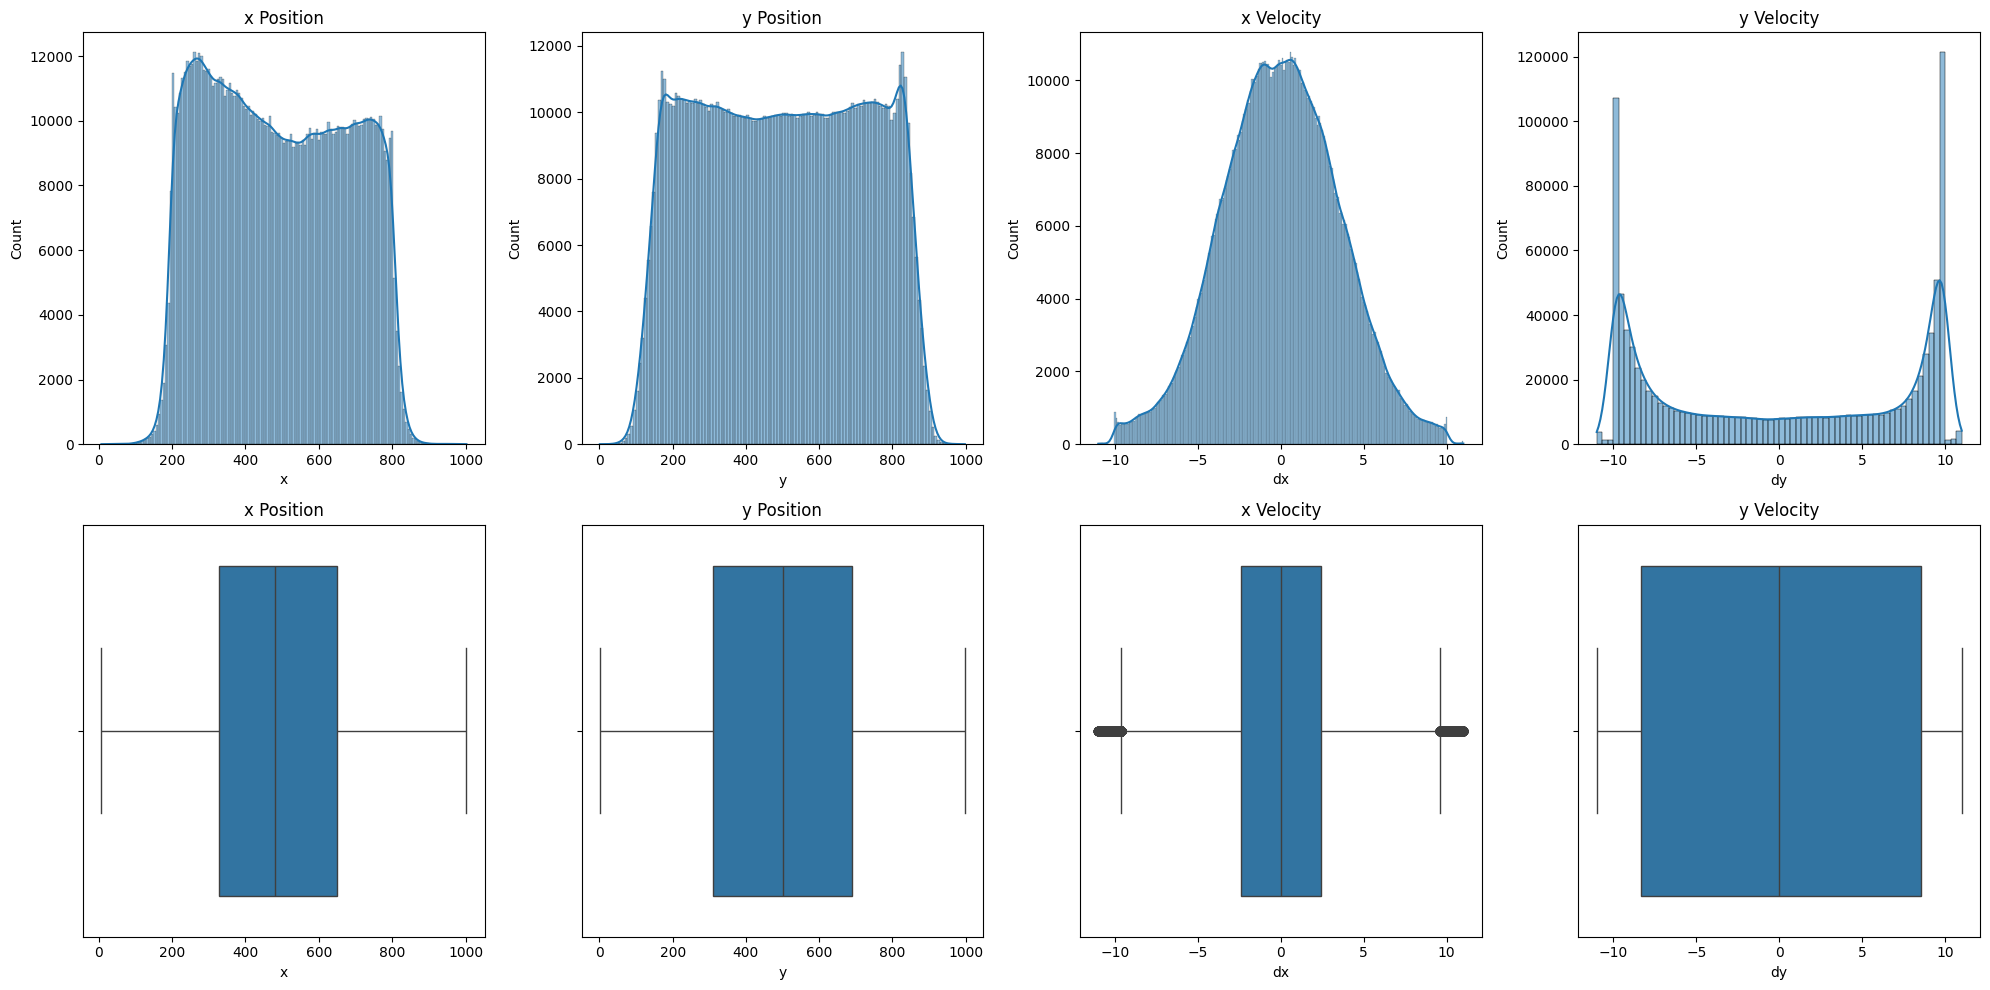

In [6]:
# Set up the matplotlib figure
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(20, 10))


# Plot histograms
sns.histplot(sim_df['x'], ax=axes[0, 0], kde=True).set(title='x Position')
sns.histplot(sim_df['y'], ax=axes[0, 1], kde=True).set(title='y Position')
sns.histplot(sim_df['dx'], ax=axes[0, 2], kde=True).set(title='x Velocity')
sns.histplot(sim_df['dy'], ax=axes[0, 3], kde=True).set(title='y Velocity')


# Plot box plots
sns.boxplot(x=sim_df['x'], ax=axes[1, 0]).set(title='x Position')
sns.boxplot(x=sim_df['y'], ax=axes[1, 1]).set(title='y Position')
sns.boxplot(x=sim_df['dx'], ax=axes[1, 2]).set(title='x Velocity')
sns.boxplot(x=sim_df['dy'], ax=axes[1, 3]).set(title='y Velocity')


plt.tight_layout()
plt.show()


   Timestep  dx_variance  dy_variance
0         0     8.819424     7.984322
1         1     8.770566     8.280108
2         2     9.611919     9.432368
3         3    11.289375    11.337999
4         4    13.894920    14.273943


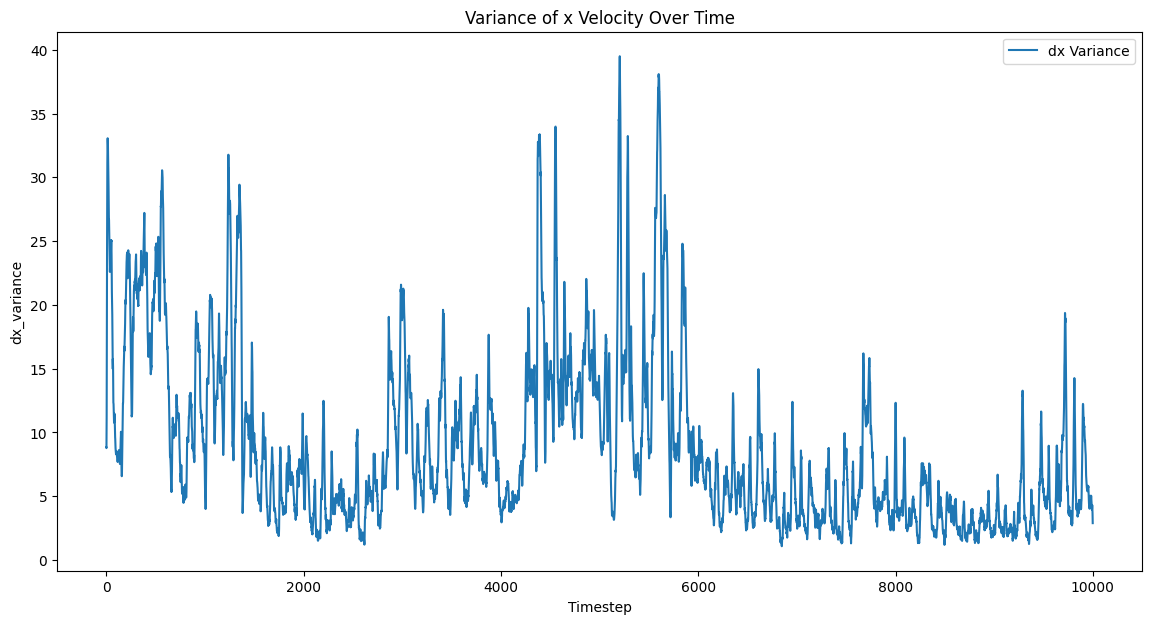

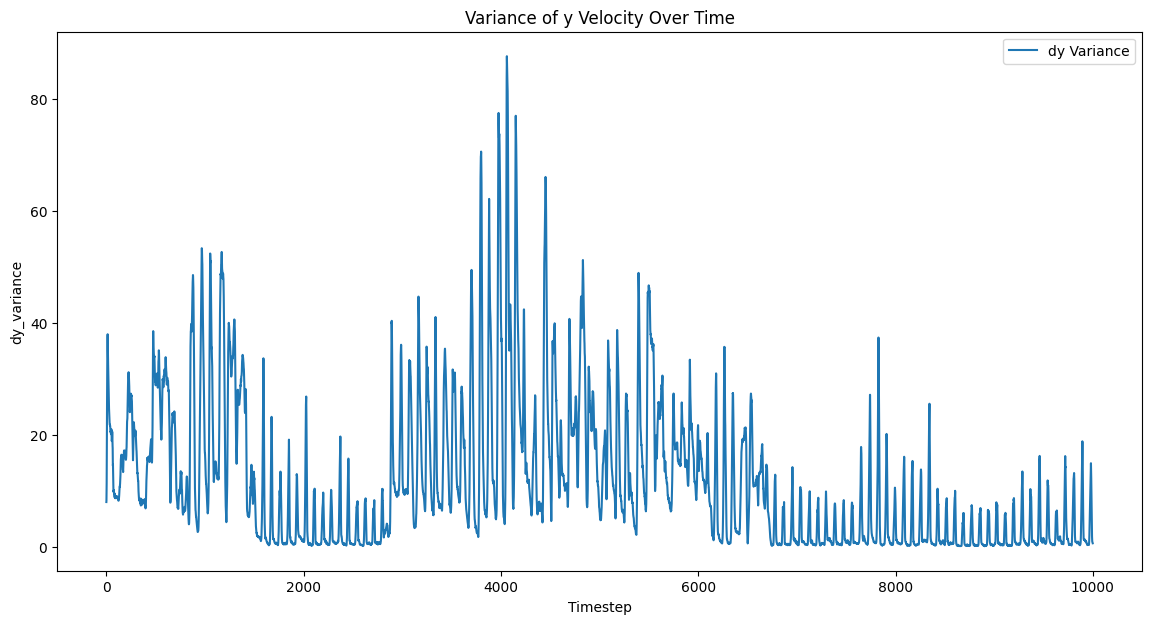

In [7]:
# Calculate variance of velocity
variance_df = sim_df.groupby('Timestep').agg({'dx': 'var', 'dy': 'var'}).reset_index()
variance_df.rename(columns={'dx': 'dx_variance', 'dy': 'dy_variance'}, inplace=True)


# Display the first few rows of the variance DataFrame
print(variance_df.head())


# Plot variance of velocity over time
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(14, 7))
sns.lineplot(data=variance_df, x='Timestep', y='dx_variance', label='dx Variance').set(title='Variance of x Velocity Over Time')


plt.figure(figsize=(14, 7))
sns.lineplot(data=variance_df, x='Timestep', y='dy_variance', label='dy Variance').set(title='Variance of y Velocity Over Time')


plt.show()

### EDA Of sim_edges_df


In [8]:
sim_edges_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10149708 entries, 0 to 10149707
Data columns (total 3 columns):
 #   Column    Dtype
---  ------    -----
 0   Boid_i    int64
 1   Boid_j    int64
 2   Timestep  int64
dtypes: int64(3)
memory usage: 232.3 MB


In [9]:
sim_edges_df.isna()

,Boid_i,Boid_j,Timestep
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
...,...,...,...
10149703,False,False,False
10149704,False,False,False
10149705,False,False,False
10149706,False,False,False


In [10]:
sim_edges_df.head()

,Boid_i,Boid_j,Timestep
0,0,39,0
1,0,57,0
2,1,32,0
3,1,34,0
4,1,83,0


In [11]:
sim_edges_df.describe()

,Boid_i,Boid_j,Timestep
count,1.014971e+07,1.014971e+07,1.014971e+07
mean,3.277366e+01,6.630387e+01,5.378551e+03
std,2.353737e+01,2.338638e+01,2.883928e+03
min,0.000000e+00,1.000000e+00,0.000000e+00
25%,1.300000e+01,5.000000e+01,2.722000e+03
50%,2.900000e+01,7.000000e+01,5.727000e+03
75%,4.900000e+01,8.600000e+01,7.917000e+03
max,9.800000e+01,9.900000e+01,9.999000e+03
